# ЛР №1 по курсу "Классическое машинное обучение и распознавание образов"

# Методы сбора данных, ч.1. (Распознование образов)

1. Загрузите изображение "img1" и "img2"
2. Напишите функцию *get_hist_features()* для расчета вектора признаков изображения на основе рассчета энергетических характеристик гистограммы изображения (среднее значение, дисперсия, энтропия, энергия), визуализируйте гистограмму
3. Напишите функцию *get_GLCM_features()* для расчета вектора признаков изображения на основе матрицы смежности (энергия, контраст, энтропия) на основе формул и с применением graycoprops
4. Напишите функцию *get_GLRLM_features()* для расчета вектора признаков изображения на основе матрицы длин серии (SSL, SSHL, LSLL, LSHL) на основе формул и с применением glrlm
5. Напишите функцию *get_LBP_features()* для расчета вектора признаков изображения на основе ЛБШ, постройте гистоаграммы для двух изображений
6. Выполните расчет признаков каждым из методов для изображений "img1" и "img2", сравните результаты

In [1]:
from skimage import io
import matplotlib.pyplot as plt
from skimage.io import imsave, imread
from skimage.feature import graycomatrix, graycoprops
from skimage.feature import local_binary_pattern
from glrlm import GLRLM
import seaborn as sns
import numpy as np
import pandas as pd

(-0.5, 99.5, 99.5, -0.5)

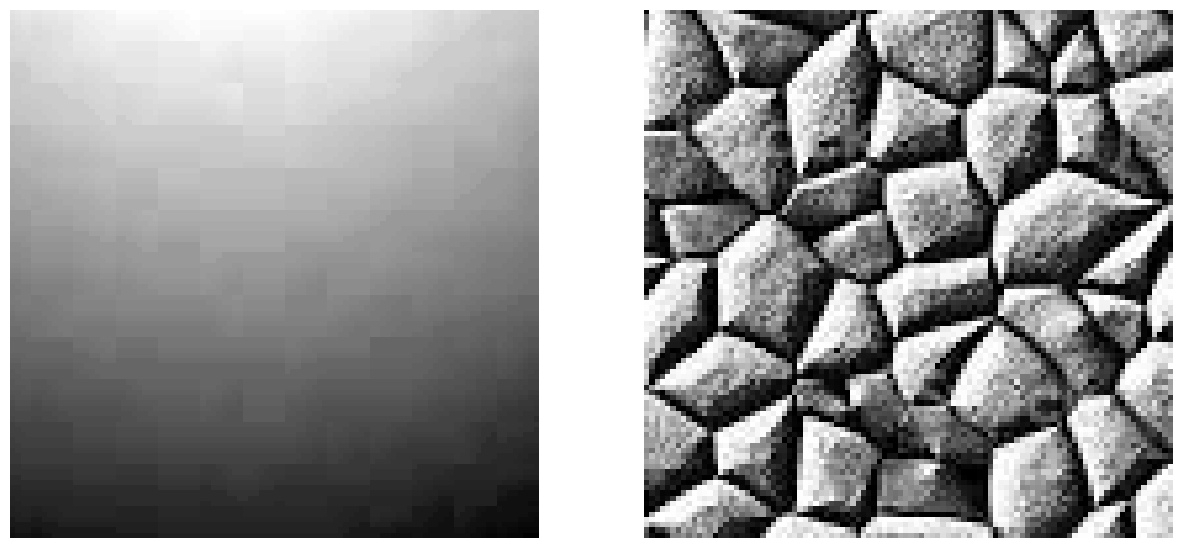

In [2]:
img1 = imread("image1.png")
img2 = imread("image2.png")

fig, axs = plt.subplots(1, 2, figsize=(15,15))
axs[0].imshow(img1, cmap="gray")
axs[0].axis("off")

axs[1].imshow(img2, cmap="gray")
axs[1].axis("off")

In [3]:
def visualize_df(img1,img2,method):
    out1 = method(img1, angle='0')
    out2 = method(img2,angle='0')
    list1 = list(out1.values())
    list2 = list(out2.values())
    data = [list1, list2]
    df = pd.DataFrame(data, columns = out1.keys())
    df.rename(index={0: "image1"}, inplace = True)
    df.rename(index={1: "image2"}, inplace = True)
    return df

In [4]:
def get_hist_features(image,angle=None,title='Intensity histogram'):
    r, p = np.array(np.unique(image.flatten(), return_counts=True))
    plt.figure()
    sns.histplot(image.flatten(),bins=64 ,color='teal').set_title(title)
    p = p/p.sum()
    M = (r*p).sum()
    D = (((r-M)**2)*p).sum()
    H = - (p*np.log2(p)).sum()
    E = (p**2).sum()
    return {'Mean':M, 'Dispersion':D, 'Entropy':H, 'Energy':E}

,Mean,Dispersion,Entropy,Energy
image1,141.5393,402.531656,6.053072,0.016078
image2,125.9184,7102.698141,7.775407,0.006638


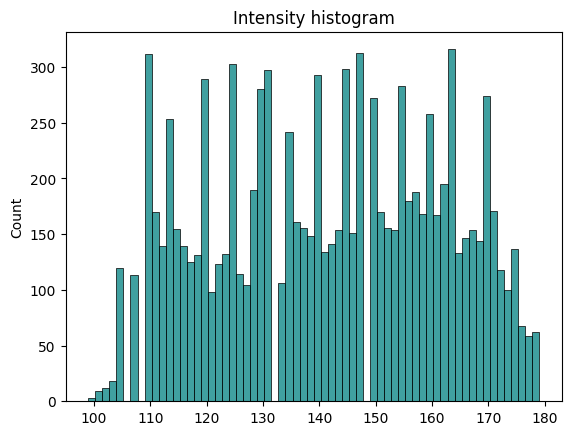

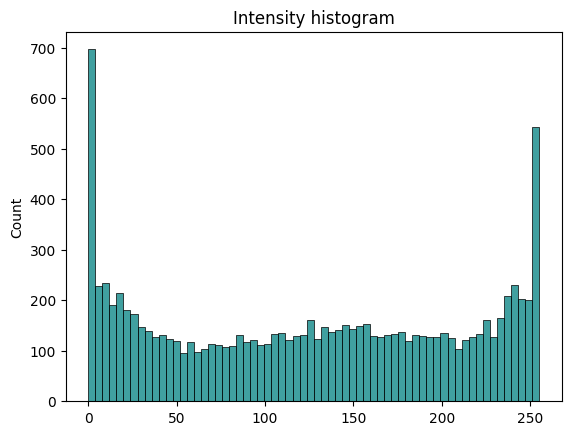

In [5]:
visualize_df(img1,img2,get_hist_features)

In [6]:
def get_GLCM_features(image,angle='0'):
    max_value = image.max()+1

    distance=[1]
    matrix_coocurrence = graycomatrix(image, 
                                    distances=[distance[0]],
                                    angles=[angle], 
                                    levels=max_value, 
                                    normed=False, 
                                    symmetric=False)
    matrix = matrix_coocurrence[:,:,0,0] / matrix_coocurrence[:,:,0,0].sum()
    E = (matrix**2).sum()
    dif_sq = np.array(list(np.arange(matrix.shape[0])-np.ones(matrix.shape[0])*i for i in range(matrix.shape[0])))**2
    C = (dif_sq*matrix).sum()
    non_zero = matrix!=0
    H = - (matrix*np.log2(matrix,where=non_zero)).sum()
    ASM_gc = graycoprops(matrix_coocurrence, 'ASM')[0][0]
    E_gc = graycoprops(matrix_coocurrence, 'energy')[0][0]
    C_gc = graycoprops(matrix_coocurrence, 'contrast')[0][0]

    return {'Energy_hm':E,'Contrast_hm':C,'Entropy':H,'ASM_gc':ASM_gc,'Energy_gc':E_gc,'Contrast_gc':C_gc}

In [7]:
visualize_df(img1,img2,get_GLCM_features)

,Energy_hm,Contrast_hm,Entropy,ASM_gc,Energy_gc,Contrast_gc
image1,0.010587,0.348889,7.071944,0.010587,0.102893,0.348889
image2,0.000254,3560.528485,12.679281,0.000254,0.015952,3560.528485


In [8]:
def get_GLRLM_features(image,angle=None):
    app = GLRLM()
    matrix = app._GLRLM__degree.create_matrix(image,np.max(image)+1).Mat_0
    i_2 = (np.array(list(np.arange(1,matrix.shape[1]+1))*matrix.shape[0]).reshape(matrix.shape))**2
    j_2 = (np.array(list(np.arange(1,matrix.shape[0]+1))*matrix.shape[1]).reshape(matrix.shape[1],matrix.shape[0]).T)**2

     
    SSLL = (matrix / (i_2*j_2)).sum() / matrix.sum()
    SSHL = (matrix*i_2 / j_2).sum() / matrix.sum()
    LSLL = (matrix*j_2 / i_2).sum() / matrix.sum()
    LSHL = (matrix *i_2*j_2).sum() / matrix.sum()

    glrlm = app.get_features(image,np.max(image)+1)
    SRE = glrlm.Features[0]
    LRE = glrlm.Features[1]
    GLU = glrlm.Features[2]
    RLU = glrlm.Features[3]
    RPC = glrlm.Features[4]
    return {'SSLL':SSLL,'SSHL':SSHL,'LSLL':LSLL,'LSHL':LSHL,'SRE':SRE,'LRE':LRE,'GLU':GLU,'RLU':RLU,'RPC':RPC}

In [9]:
visualize_df(img1,img2,get_GLRLM_features)

,SSLL,SSHL,LSLL,LSHL,SRE,LRE,GLU,RLU,RPC
image1,0.000011,0.002148,4757.073310,764751.194640,1.503,94.250,437.019,3634.918,0.818
image2,0.036289,0.061327,22576.985496,25315.413199,3.933,4.311,138.615,37366.413,1.526


In [38]:
def get_LBP_features(image,ax,title=None):
    METHOD = 'uniform'
    radius = 3
    n_points = 8 * radius
    lbp = local_binary_pattern(image, n_points, radius, METHOD)
    n_bins = int(lbp.max() + 1)
    ax.hist(lbp.ravel(), density=True, bins=n_bins, range=(0, n_bins),color='teal')
    ax.set_title(title)
    unique, count = np.unique(lbp.flatten(),return_counts=True)
    unique = unique.astype(np.int32)
    out = np.zeros(256)
    out[unique] = count
    return out



array([ 657.,  466.,  220.,  145.,  134.,  115.,  109.,  106.,  114.,
        151.,  175.,  211.,  307.,  184.,  145.,  108.,   80.,   82.,
         38.,   39.,   55.,   68.,  147.,  347.,  831., 4966.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,

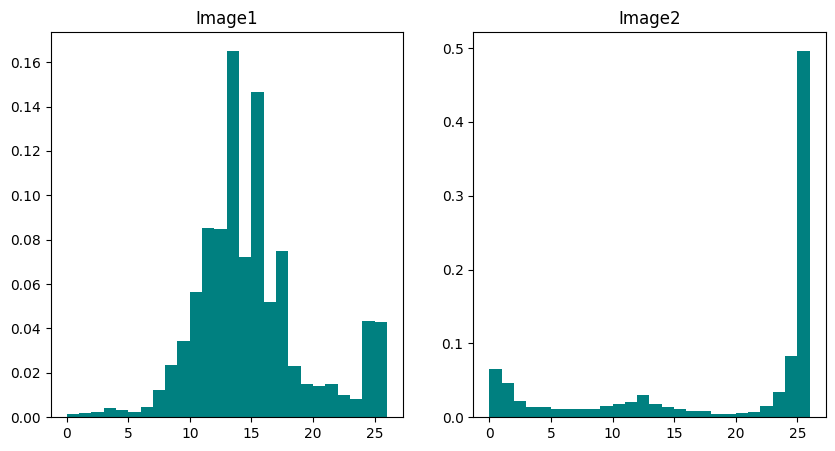

In [37]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
lbp=get_LBP_features(img1,ax1,title='Image1')
get_LBP_features(img2,ax2,title='Image2')